In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import pickle
import os

df = pd.read_csv("dataset_fix.csv")

In [2]:
label_mapping = {'positif': 1, 'negatif': 0, 'netral': 2}
df = df[df['label_sentimen'].isin(label_mapping.keys())]  # Hanya ambil baris yang sesuai mapping
df['label_sentimen'] = df['label_sentimen'].map(label_mapping)
df['label_sentimen'] = df['label_sentimen'].astype(int)

In [3]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['komentar_bersih'])

X = tokenizer.texts_to_sequences(df['komentar_bersih'])
X = pad_sequences(X, maxlen=100)

In [4]:
y = to_categorical(df['label_sentimen'])

In [5]:
# Hapus data yang komentar_bersih-nya kosong
df = df.dropna(subset=['komentar_bersih'])

# Pastikan semua komentar_bersih bertipe string
df['komentar_bersih'] = df['komentar_bersih'].astype(str)

# Tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['komentar_bersih'])
X = tokenizer.texts_to_sequences(df['komentar_bersih'])
X = pad_sequences(X, maxlen=100)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\Asus\Downloads\Folder HD\UAS2\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4356 - loss: 1.0529 - val_accuracy: 0.5160 - val_loss: 0.9516
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5709 - loss: 0.9100 - val_accuracy: 0.6640 - val_loss: 0.8677
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8263 - loss: 0.6406 - val_accuracy: 0.6680 - val_loss: 0.7247
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9220 - loss: 0.3054 - val_accuracy: 0.7440 - val_loss: 0.6371
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9838 - loss: 0.1052 - val_accuracy: 0.7360 - val_loss: 0.6695
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9974 - loss: 0.0412 - val_accuracy: 0.7360 - val_loss: 0.7037
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9973 - loss: 0.0287 - val_accuracy: 0.7080 - val_loss: 0.8358
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9998 - loss: 0.0196 - val_accuracy: 0.7320 - v

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7257 - loss: 1.1567
Akurasi Model: 74.04%


In [10]:
os.makedirs("model", exist_ok=True)
model.save("model/rnn_model.h5")
with open("model/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

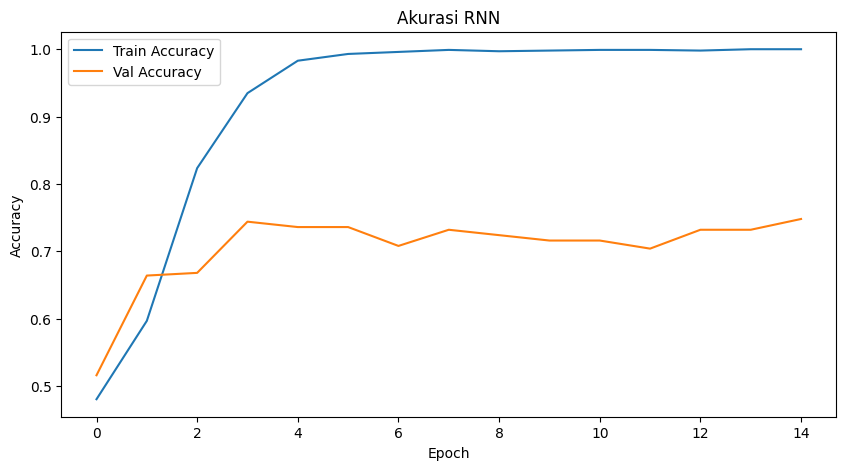

In [11]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("model/output_rnn.png")
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


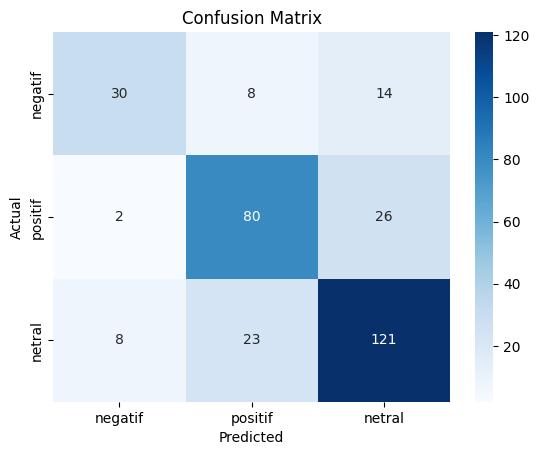

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

label_classes = ['negatif', 'positif', 'netral']
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("model/Confusion Matrix_RNN.png")
plt.show()



In [15]:

print("Evaluasi Per Kelas:")
print(classification_report(y_true, y_pred_classes, target_names=['Negatif', 'Positif', 'Netral']))
print(f"Akurasi Model LSTM: {accuracy * 100:.2f}%")

Evaluasi Per Kelas:
              precision    recall  f1-score   support

     Negatif       0.75      0.58      0.65        52
     Positif       0.72      0.74      0.73       108
      Netral       0.75      0.80      0.77       152

    accuracy                           0.74       312
   macro avg       0.74      0.70      0.72       312
weighted avg       0.74      0.74      0.74       312

Akurasi Model LSTM: 74.04%
